In [4]:
# pip install pandas

In [71]:
import pandas as pd
import os
import numpy as np

current_dir = os.getcwd()
file_name = "Cleaned_Datasets/post-intervention_response_0518_filled.csv"
file_path = os.path.join(current_dir, file_name)
df = pd.read_csv(file_path)

In [72]:
current_dir = os.getcwd()
task_file_name = "Cleaned_Datasets/task_cleaned.csv"
task_file_path = os.path.join(current_dir, task_file_name)
task = pd.read_csv(task_file_path)

In [73]:
len(task['Participant_ID'].unique())

39

In [74]:
len(df['Participant Private ID'].unique())

41

In [75]:
unmatched_ids = df[~df['Participant Private ID'].isin(task['Participant_ID'])]['Participant Private ID'].unique()
print(unmatched_ids)

[13398032. 13401568.]


In [48]:
df = df[df['Participant Private ID'].isin(task['Participant_ID'])]

In [49]:
df_analysis = df.copy()
df_analysis = df_analysis.drop(columns='7. Location object-11 Response')
df_analysis = df_analysis.rename(columns={
    "randomiser-7gnq": "cue",
    "1. Age object-3 Response": "age",
    "2. Gender object-4 Response": "gender",
    "3. Hispanic/Latino object-6 Response": "hispanic",
    "4. Identify Race object-8 Response": "race",
    "5. Level of Education object-15 Response": "education",
    "6. Income object-10 Response": "income",
    "8. How often object-12 Response": "shoppingfreq"
})

In [50]:
df_analysis.columns

Index(['Participant Private ID', 'cue', 'age', 'gender', 'hispanic', 'race',
       'education', 'income', 'shoppingfreq', 'perceived_decision_pressure',
       'perceived_authenticity_of_product', 'perceived_cue_influence',
       'decision_confidence', 'perceived_manipulativeness'],
      dtype='object')

In [51]:
df_analysis.info()
df_analysis.describe(include='all')  # Categorical + numeric
df_analysis.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Index: 39 entries, 0 to 40
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Participant Private ID             39 non-null     float64
 1   cue                                39 non-null     object 
 2   age                                39 non-null     object 
 3   gender                             39 non-null     object 
 4   hispanic                           39 non-null     object 
 5   race                               39 non-null     object 
 6   education                          39 non-null     object 
 7   income                             39 non-null     object 
 8   shoppingfreq                       39 non-null     object 
 9   perceived_decision_pressure        39 non-null     int64  
 10  perceived_authenticity_of_product  39 non-null     int64  
 11  perceived_cue_influence            39 non-null     int64  
 12  d

Participant Private ID               0
cue                                  0
age                                  0
gender                               0
hispanic                             0
race                                 0
education                            0
income                               0
shoppingfreq                         0
perceived_decision_pressure          0
perceived_authenticity_of_product    0
perceived_cue_influence              0
decision_confidence                  0
perceived_manipulativeness           0
dtype: int64

### Sample Characteristics

In [52]:
# pip install seaborn

            Count  Percentage
cue                          
P+S            11        28.2
Scarcity       10        25.6
Popularity      9        23.1
No Cue          9        23.1


/var/folders/7h/mx7nc7vj63551qp5lczzf1lr0000gn/T/ipykernel_64086/1990776836.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x="cue", data=df_analysis, palette="Set2", edgecolor="black")


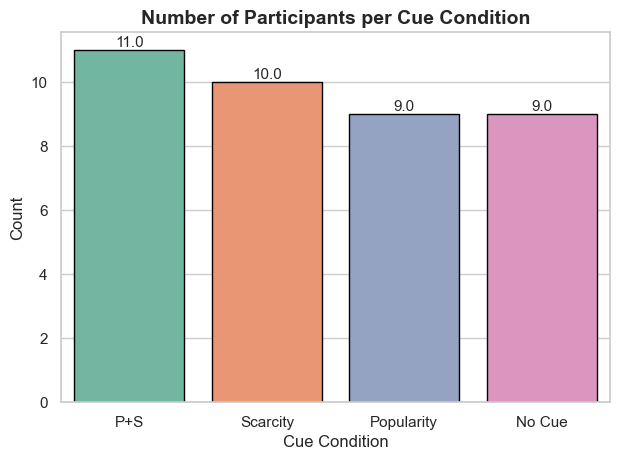

In [53]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# sample number and proportion
cue_counts = df_analysis['cue'].value_counts()
cue_percent = df_analysis['cue'].value_counts(normalize=True) * 100
cue_summary = pd.DataFrame({'Count': cue_counts, 'Percentage': cue_percent.round(1)})
print(cue_summary)

# visualization
import seaborn as sns
import matplotlib.pyplot as plt

ax = sns.countplot(x="cue", data=df_analysis, palette="Set2", edgecolor="black")

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=11)

plt.title("Number of Participants per Cue Condition", fontsize=14, weight='bold')
plt.xlabel("Cue Condition", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.tight_layout()
plt.show()

### Demographics


--- AGE ---
age
18–24 years old    28
25–34 years old    11
Name: count, dtype: int64


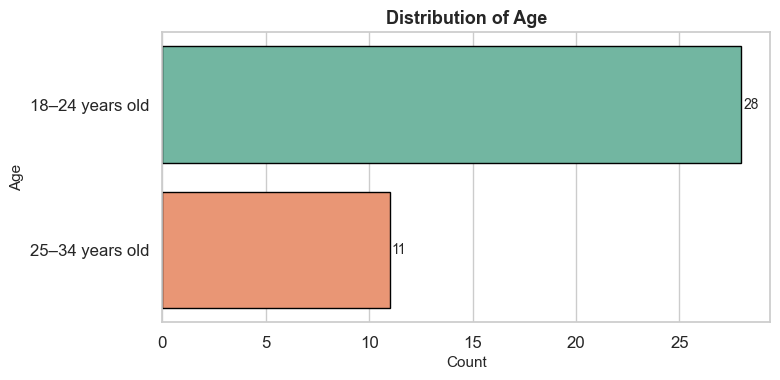


--- GENDER ---
gender
Female               28
Male                 10
Prefer not to say     1
Name: count, dtype: int64


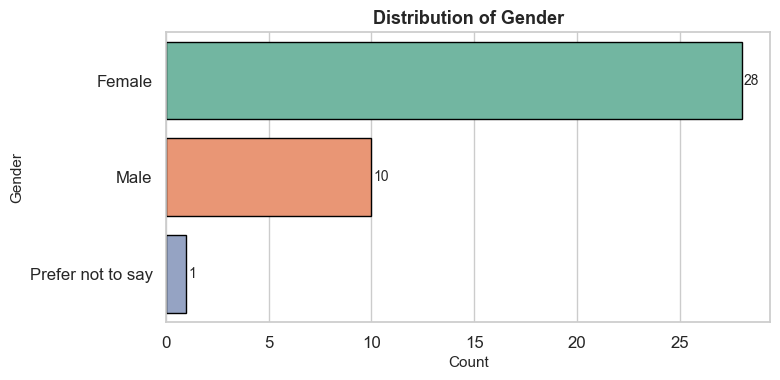


--- HISPANIC ---
hispanic
No    39
Name: count, dtype: int64


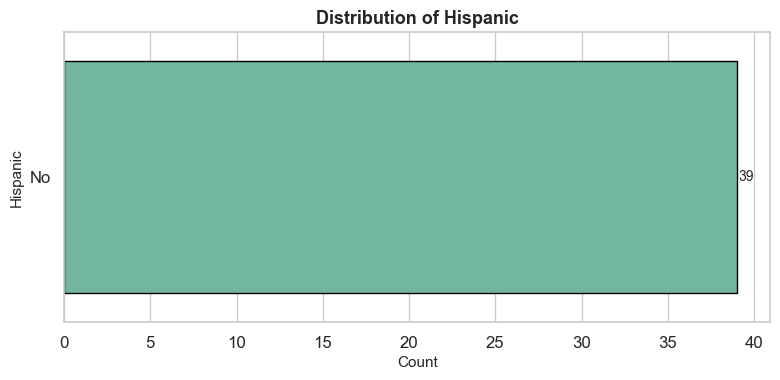


--- RACE ---
race
Asian                        31
White                         6
Black or African American     2
Name: count, dtype: int64


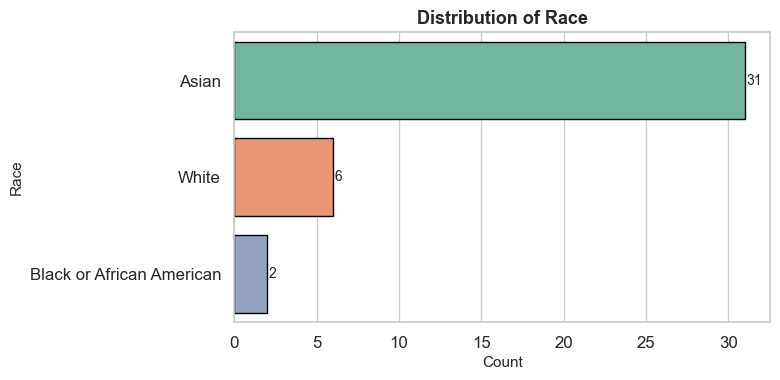


--- EDUCATION ---
education
Bachelor's degree (e.g., BA, BS)                        23
Master's degree (e.g., MA, MS, MBA)                     14
High school diploma or equivalent (e.g., GED)            1
Doctorate or professional degree (e.g., PhD, JD, MD)     1
Name: count, dtype: int64


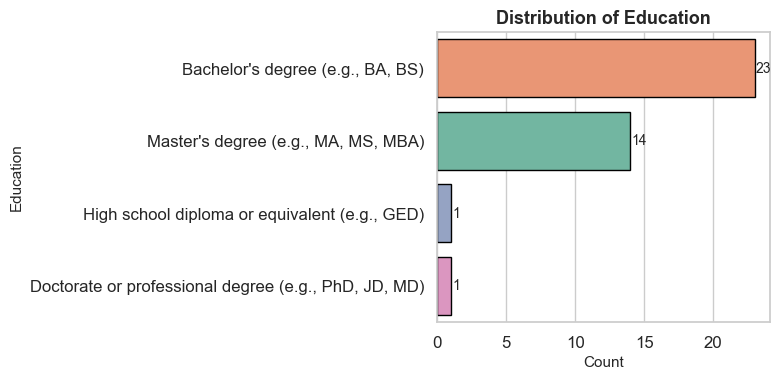


--- INCOME ---
income
Less than $20,000    25
$20,000–$39,999       7
$80,000–$99,999       5
$100,000–$149,999     1
$40,000–$59,999       1
Name: count, dtype: int64


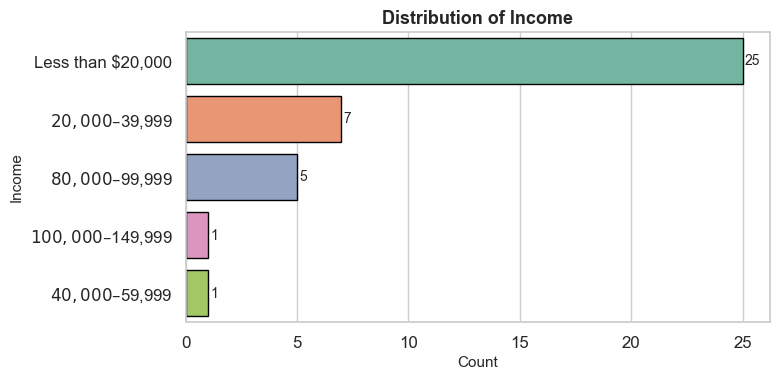


--- SHOPPINGFREQ ---
shoppingfreq
About once a month        13
2–3 times a month         10
Multiple times a week      7
Once a week                5
Less than once a month     4
Name: count, dtype: int64


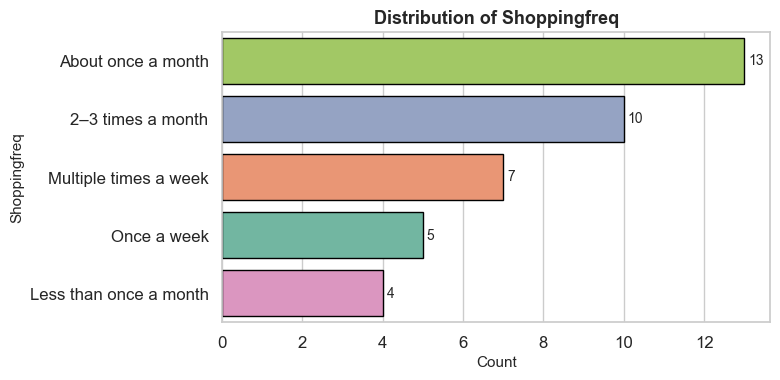

In [54]:
demo_vars = ['age', 'gender', 'hispanic', 'race', 'education', 'income', 'shoppingfreq']

sns.set_theme(style="whitegrid", palette="Set2", font_scale=1.1)

for var in demo_vars:
    print(f"\n--- {var.upper()} ---")
    vc = df_analysis[var].value_counts()
    print(vc)

    plt.figure(figsize=(8, 4))
    ax = sns.countplot(y=var, data=df_analysis, order=vc.index, hue=var, palette="Set2", edgecolor="black")

    for p in ax.patches:
        count = int(p.get_width())
        ax.annotate(f'{count}', (p.get_width() + 0.1, p.get_y() + p.get_height() / 2),
                    va='center', fontsize=10)

    plt.title(f"Distribution of {var.capitalize()}", fontsize=13, weight='bold')
    plt.xlabel("Count", fontsize=11)
    plt.ylabel(var.capitalize(), fontsize=11)
    plt.tight_layout()
    plt.show()


### Dependent Measures

In [55]:
outcomes = [
    'perceived_decision_pressure',
    'perceived_authenticity_of_product',
    'perceived_cue_influence',
    'decision_confidence',
    'perceived_manipulativeness'
]

print(df_analysis[outcomes].describe())

       perceived_decision_pressure  perceived_authenticity_of_product  \
count                    39.000000                          39.000000   
mean                      2.307692                           3.948718   
std                       1.320961                           1.212842   
min                       1.000000                           2.000000   
25%                       1.000000                           3.000000   
50%                       2.000000                           4.000000   
75%                       3.000000                           5.000000   
max                       6.000000                           6.000000   

       perceived_cue_influence  decision_confidence  \
count                39.000000            39.000000   
mean                  2.974359             5.102564   
std                   1.708911             1.465298   
min                   1.000000             2.000000   
25%                   1.000000             4.000000   
50%         

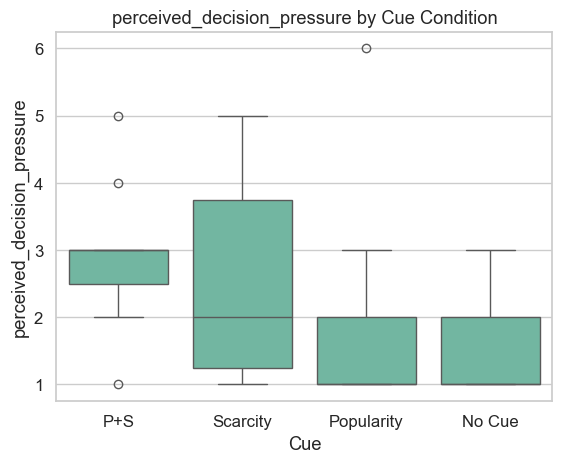

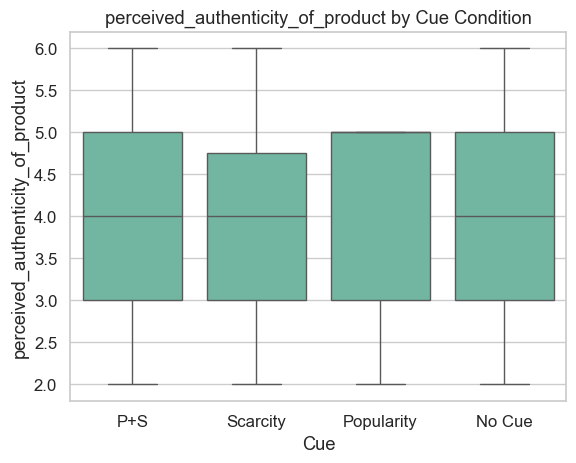

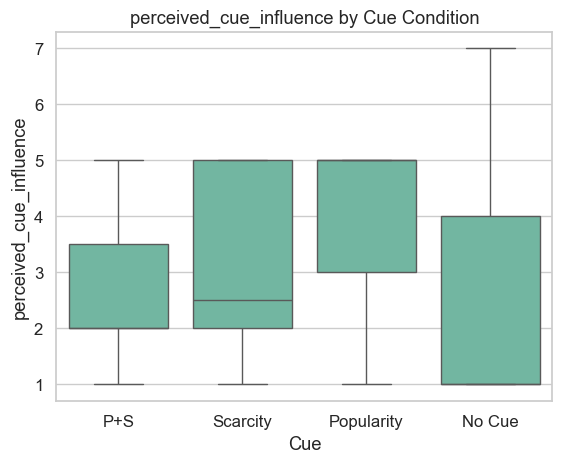

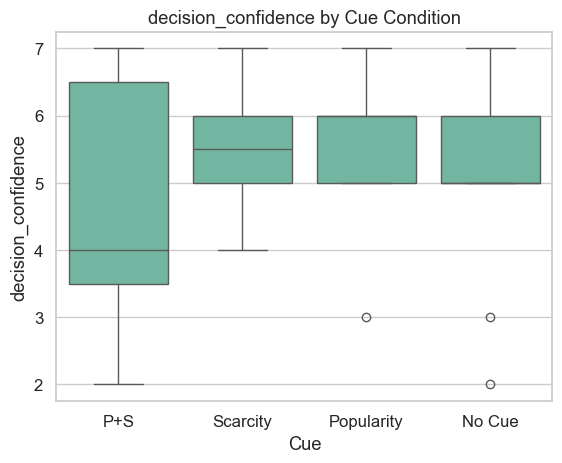

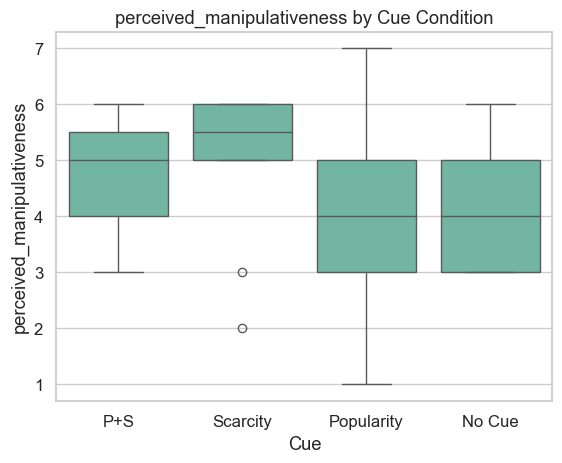

In [56]:
for var in outcomes:
    sns.boxplot(x='cue', y=var, data=df_analysis)
    plt.title(f'{var} by Cue Condition')
    plt.ylabel(var)
    plt.xlabel('Cue')
    plt.show()


In [57]:
# pip install scipy

In [58]:
from scipy.stats import kruskal

for var in outcomes:
    groups = [group[var].dropna() for name, group in df_analysis.groupby('cue')]
    stat, p = kruskal(*groups)
    print(f"{var}: Kruskal-Wallis H = {stat:.2f}, p = {p:.4f}")


perceived_decision_pressure: Kruskal-Wallis H = 7.15, p = 0.0672
perceived_authenticity_of_product: Kruskal-Wallis H = 0.38, p = 0.9449
perceived_cue_influence: Kruskal-Wallis H = 3.20, p = 0.3619
decision_confidence: Kruskal-Wallis H = 1.37, p = 0.7122
perceived_manipulativeness: Kruskal-Wallis H = 3.34, p = 0.3426


In [59]:
# pip install scikit_posthocs

In [60]:
import scikit_posthocs as sp
import pandas as pd

# Ensure 'cue' is categorical
df_analysis['cue'] = df_analysis['cue'].astype('category')

# Run Dunn's test on perceived_decision_pressure
posthoc = sp.posthoc_dunn(
    df_analysis, 
    val_col='perceived_decision_pressure', 
    group_col='cue', 
    p_adjust='bonferroni'
)

print(posthoc)

              No Cue       P+S  Popularity  Scarcity
No Cue      1.000000  0.114472    1.000000       1.0
P+S         0.114472  1.000000    0.210583       1.0
Popularity  1.000000  0.210583    1.000000       1.0
Scarcity    1.000000  1.000000    1.000000       1.0


### Exploratory Insights

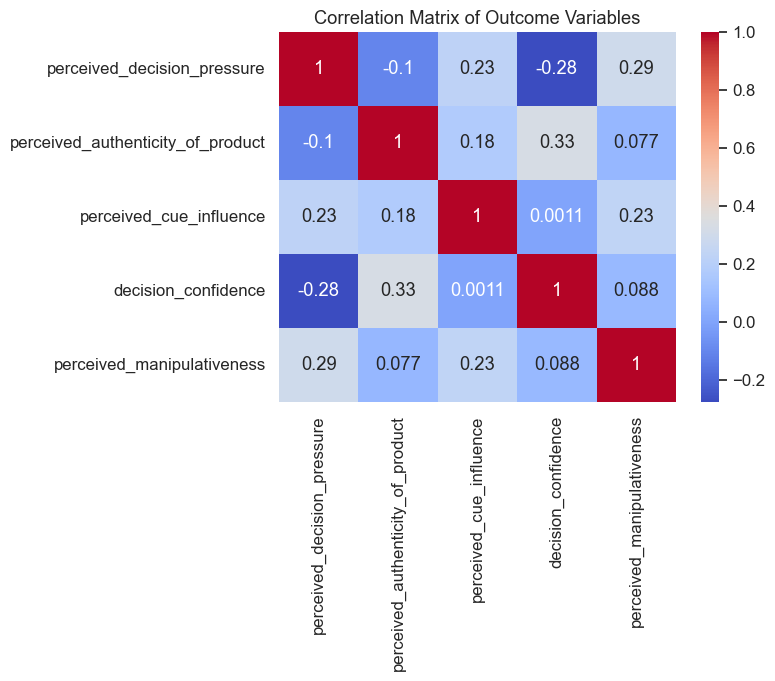

In [61]:
# Correlation Matrix of Outcome Variables
sns.heatmap(df_analysis[outcomes].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix of Outcome Variables")
plt.show()

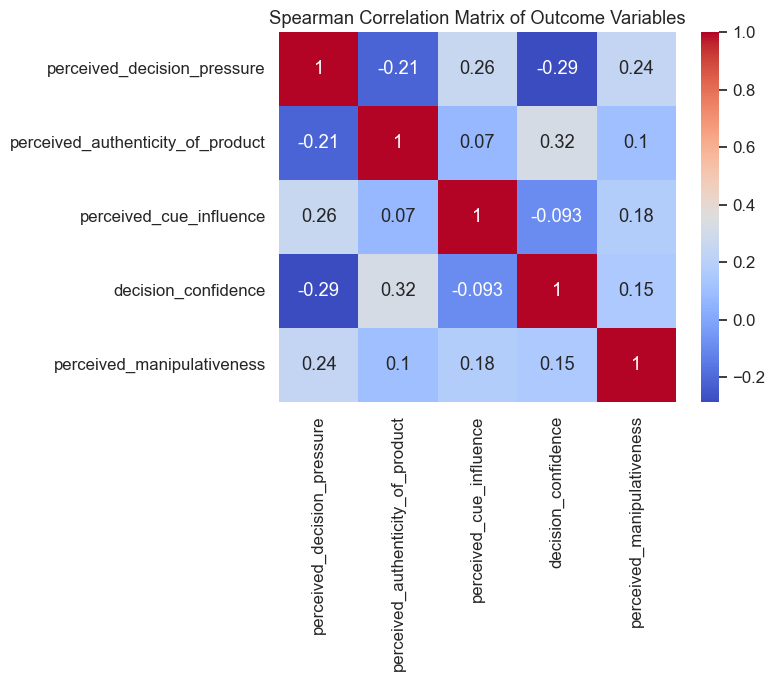

In [26]:
# Compute Spearman correlation
spearman_corr = df_analysis[outcomes].corr(method='spearman')

# Plot heatmap
sns.heatmap(spearman_corr, annot=True, cmap='coolwarm')
plt.title("Spearman Correlation Matrix of Outcome Variables")
plt.show()


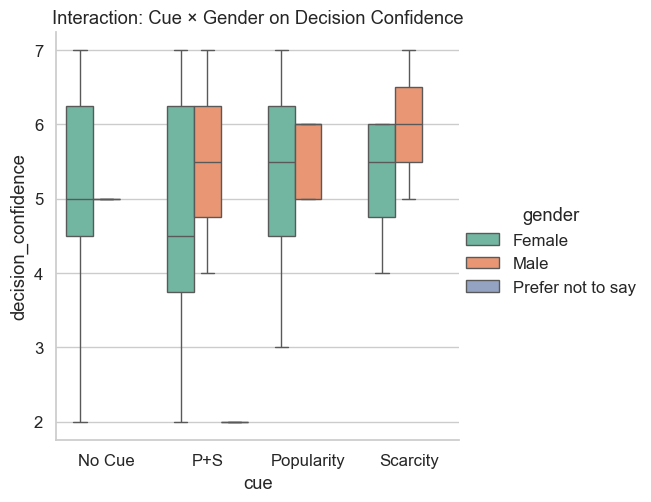

In [62]:
# cue x gender -> confidence
sns.catplot(x='cue', y='decision_confidence', hue='gender', data=df_analysis, kind='box')
plt.title("Interaction: Cue × Gender on Decision Confidence")
plt.show()

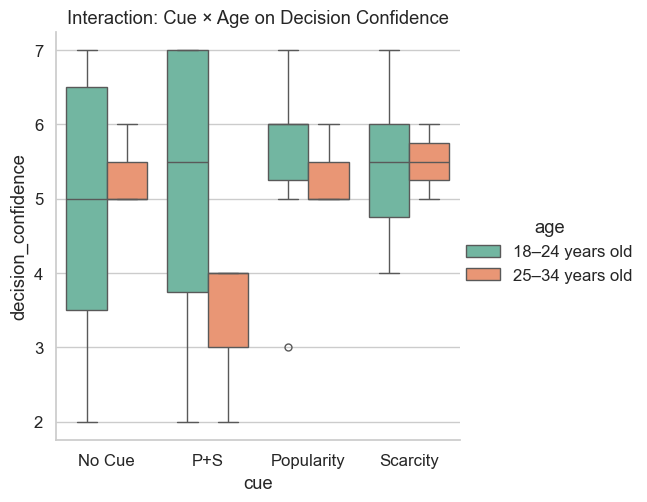

In [63]:
# cue x age -> confidence
sns.catplot(x='cue', y='decision_confidence', hue='age', data=df_analysis, kind='box')
plt.title("Interaction: Cue × Age on Decision Confidence")
plt.show()

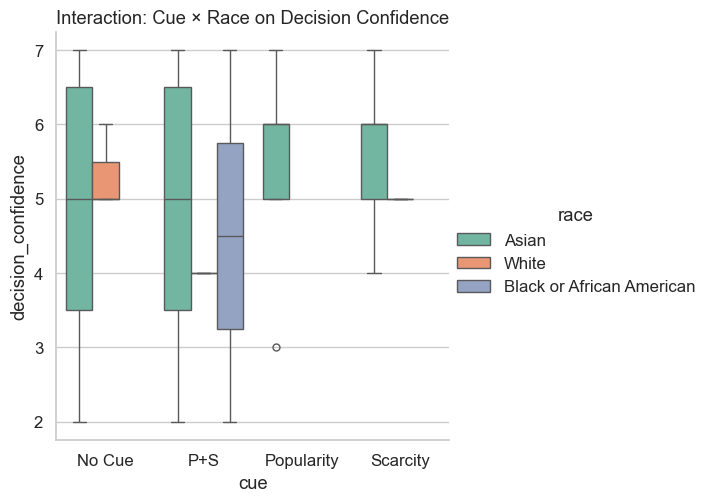

In [64]:
# cue x race -> confidence
sns.catplot(x='cue', y='decision_confidence', hue='race', data=df_analysis, kind='box')
plt.title("Interaction: Cue × Race on Decision Confidence")
plt.show()

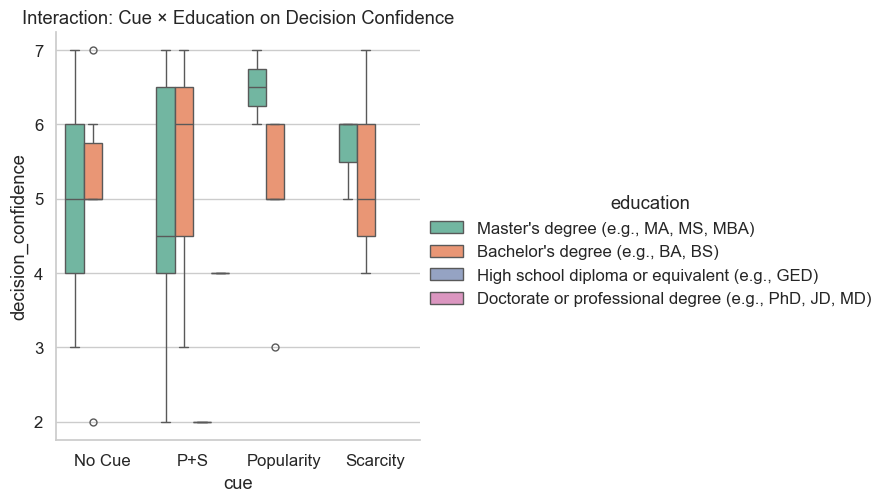

In [65]:
# cue x education -> confidence
sns.catplot(x='cue', y='decision_confidence', hue='education', data=df_analysis, kind='box')
plt.title("Interaction: Cue × Education on Decision Confidence")
plt.show()

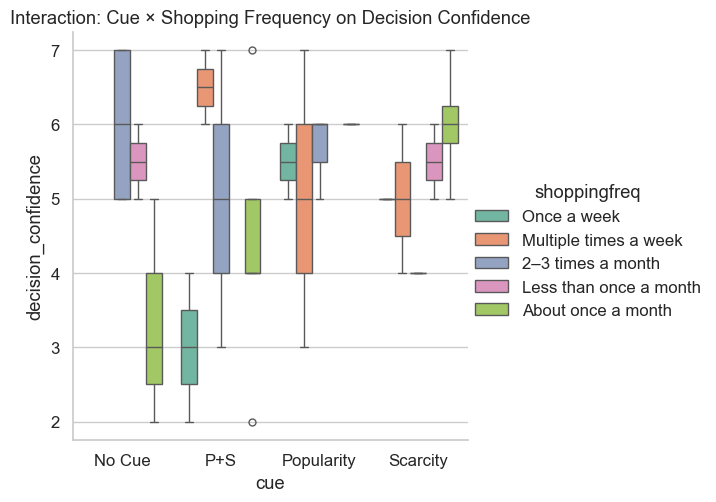

In [66]:
# cue x shoppintfreq -> confidence
sns.catplot(x='cue', y='decision_confidence', hue='shoppingfreq', data=df_analysis, kind='box')
plt.title("Interaction: Cue × Shopping Frequency on Decision Confidence")
plt.show()

In [67]:
# pip install statsmodels patsy

In [68]:
# decision_confidence ~ cue * age

import statsmodels.formula.api as smf

df_analysis['cue'] = df_analysis['cue'].astype('category')
df_analysis['age'] = df_analysis['age'].astype('category')

model = smf.ols('decision_confidence ~ cue * age', data=df_analysis).fit()

print(model.summary())

                             OLS Regression Results                            
Dep. Variable:     decision_confidence   R-squared:                       0.147
Model:                             OLS   Adj. R-squared:                 -0.045
Method:                  Least Squares   F-statistic:                    0.7641
Date:                 Sun, 18 May 2025   Prob (F-statistic):              0.621
Time:                         15:17:16   Log-Likelihood:                -66.628
No. Observations:                   39   AIC:                             149.3
Df Residuals:                       31   BIC:                             162.6
Df Model:                            7                                         
Covariance Type:             nonrobust                                         
                                               coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------

In [69]:
# decision_confidence ~ cue * shoppingfreq

df_analysis['shoppingfreq'] = df_analysis['shoppingfreq'].astype('category')

model = smf.ols('decision_confidence ~ cue * shoppingfreq', data=df_analysis).fit()
print(model.summary())

                             OLS Regression Results                            
Dep. Variable:     decision_confidence   R-squared:                       0.430
Model:                             OLS   Adj. R-squared:                  0.058
Method:                  Least Squares   F-statistic:                     1.155
Date:                 Sun, 18 May 2025   Prob (F-statistic):              0.368
Time:                         15:17:17   Log-Likelihood:                -58.782
No. Observations:                   39   AIC:                             149.6
Df Residuals:                       23   BIC:                             176.2
Df Model:                           15                                         
Covariance Type:             nonrobust                                         
                                                               coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------